In [1]:
import tensorflow as tf
# from keras import Dense
from tfkan import DenseKAN

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
seed_value = 0
import os, random
import numpy as np

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1, noise=0.1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

l = DenseKAN(1, grid_size=20)
l.build(input_shape=(None, 10))
# print(l(x_train[4:500:25]))

In [4]:
from scipy.interpolate import BSpline
from tfkan import spline
print(l.grid[0])
x = np.array([[[0.5, 0.6, 0.7],[0.5, 0.6, 0.7]], [[0.5, 0.6, 0.7],[0.5, 0.6, 0.7]]])
lst = l.get_spline_list()
print(lst)
print(lst[0](x))
print(spline(x[0:1, 2:3], l.grid[0:1], l.spline_kernel[0:1, :, 0:1], l.spline_order))

tf.Tensor(
[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ], shape=(20,), dtype=float64)
[<tfkan.dense.Spline object at 0x0000026972345520>, <tfkan.dense.Spline object at 0x000002692E18DA90>, <tfkan.dense.Spline object at 0x000002692E06A870>, <tfkan.dense.Spline object at 0x000002692DFC2BA0>, <tfkan.dense.Spline object at 0x0000026972345D30>, <tfkan.dense.Spline object at 0x0000026972312990>, <tfkan.dense.Spline object at 0x000002692E0EA4B0>, <tfkan.dense.Spline object at 0x000002692E1DAF90>, <tfkan.dense.Spline object at 0x000002692DFC2600>, <tfkan.dense.Spline object at 0x000002692E12B770>]
tf.Tensor(
[[[-0.00161311  0.03443951  0.03067341]
  [-0.00161311  0.03443951  0.03067341]]

 [[-0.00161311  0.03443951  0.03067341]
  [-0.00161311  0.03443951  0.03067341]]], shape=(2, 2, 3), dtype=float

InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,0,3,18] vs. [1,0,2,19] [Op:Mul] name: 

In [17]:
# MLP
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
mlp.build(input_shape=(None, 10))
mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
mlp_history = mlp.fit(x_train, y_train, epochs=300, batch_size=64, validation_data=(x_test, y_test), verbose=0)

CPU times: total: 14.5 s
Wall time: 23.1 s


In [19]:
# KAN
import keras
kan = tf.keras.models.Sequential([
    DenseKAN(4, grid_size=11),
    DenseKAN(1, grid_size=11)
])

kan.build(input_shape=(None, 10))
kan.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_kan_6 (DenseKAN)          │ (None, 4)              │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_kan_7 (DenseKAN)          │ (None, 1)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264 (2.06 KB)

 Trainable params: 264 (2.06 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
kan_history = kan.fit(x_train, y_train, epochs=300, batch_size=64, validation_data=(x_test, y_test), verbose=0)



KeyboardInterrupt: 

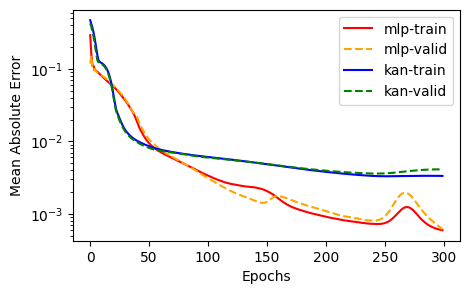

In [22]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.semilogy(mlp_history.history['mae'], label='mlp-train', ls="-", color='red')
plt.semilogy(mlp_history.history['val_mae'], label='mlp-valid', ls="--", color='orange')
plt.semilogy(kan_history.history['mae'], label='kan-train', ls="-", color='blue')
plt.semilogy(kan_history.history['val_mae'], label='kan-valid', ls="--", color='green')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()